In [1]:
import sys
sys.path.append('..')

In [2]:
from workspace import nometools as nome

In [3]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
main_path = '/home/kevin/DNA-Methylation-patterns/'
data_path = main_path + 'downstream/'

In [5]:
infile = data_path + 'GCH.promoter.intersect.bed'
_, df_GCH_meth = nome.get_promoter_methylation(infile)

In [6]:
df_GCH_meth.head()

,trans_id,refid,gene_name,chrom,promoter_start,promoter_end,TSS,TES,strand,meth_start_genome,meth_end_genome,meth_pos_promo_abs,meth_pos_promo_rel,meth_rate,coverage
0,NM_001005277-621034,NM_001005277,OR4F16,chr1,621034,624034,621095,622034,-,622849,622850,1184,-816,33.33,3
1,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857344,857345,42,-1958,66.67,3
2,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857350,857351,48,-1952,20.00,5
3,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857351,857352,49,-1951,66.67,3
4,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857391,857392,89,-1911,50.00,4


In [5]:
chr_filter = 'chr1'

In [8]:
# df_GCH_meth_filtered = df_GCH_meth[df_GCH_meth['chrom'] == 'chr20']
# df_GCH_meth_filtered = df_GCH_meth[df_GCH_meth['coverage'] >= 5]
df_GCH_meth_filtered = df_GCH_meth[np.all([df_GCH_meth['chrom'] == chr_filter, df_GCH_meth['strand'] == '+'], axis=0)]

In [9]:
df_GCH_meth_filtered.head()

,trans_id,refid,gene_name,chrom,promoter_start,promoter_end,TSS,TES,strand,meth_start_genome,meth_end_genome,meth_pos_promo_abs,meth_pos_promo_rel,meth_rate,coverage
1,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857344,857345,42,-1958,66.67,3
2,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857350,857351,48,-1952,20.00,5
3,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857351,857352,49,-1951,66.67,3
4,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857391,857392,89,-1911,50.00,4
5,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857392,857393,90,-1910,0.00,5


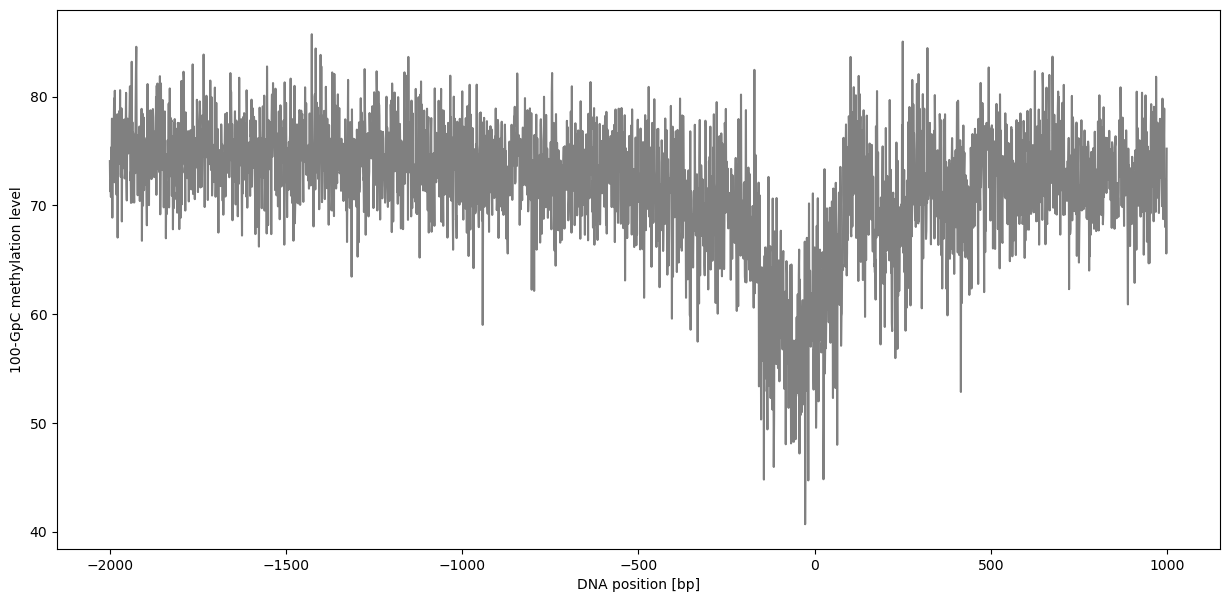

In [10]:
nome.plot_avg_methylation_levels(df_GCH_meth_filtered, 'GCH')

In [11]:
print('no of promoters in chr1', len(df_GCH_meth_filtered['trans_id'].unique()))

no of promoters in chr1 1683


In [12]:
reffile = data_path + 'refGene.promoters.bed'
n = 0
with open(reffile, 'r') as fin:
    for line in fin:
        # n = sum(1 if line.split('/t')[0] == 'chr20' else 0 for line in fin)
        n = sum(1 if line.split('/t')[0] == chr_filter and line.split('/t')[7] == '+' else 0 for line in fin)

print('no of promoters in chr1 (from promoter file)', len(df_GCH_meth_filtered['trans_id'].unique()))

no of promoters in chr1 (from promoter file) 1683


In [6]:
infile = data_path + 'GCH.filtered.sorted.bed'
res = nome.filter_by_chr(infile, chrs=[chr_filter])

start traversing bed file  /home/kevin/DNA-Methylation-patterns/downstream/GCH.filtered.sorted.bed n =  102539428
progress : 10.0% and time elapsed 0.5 min
progress : 20.0% and time elapsed 0.67 min
progress : 30.0% and time elapsed 0.83 min
progress : 40.0% and time elapsed 1.0 min
progress : 50.0% and time elapsed 1.16 min
progress : 60.0% and time elapsed 1.33 min
progress : 70.0% and time elapsed 1.49 min
progress : 80.0% and time elapsed 1.66 min
progress : 90.0% and time elapsed 1.82 min
progress : 100.0% and time elapsed 1.99 min


In [7]:
len(res), res[0], res[-1]

(8004403,
 ['chr1', 13026, 13027, '+', 0.0, 3],
 ['chr1', 249239673, 249239674, '+', 33.33, 3])

In [15]:
## validity check -- later investigate difference in plots

groups = df_GCH_meth_filtered.groupby('trans_id')

print('no of promoters', len(groups))

points = []
for name, group in tqdm(groups):
    start = group.iloc[0]['promoter_start']
    end = group.iloc[0]['promoter_end']

    for site in res:
        ## only + strands
        if site[3] == '+':
            ## check if GCH site is inside promoter
            if site[1] >= start and site[2] <= end:
                xpos = site[1] - start
                yval = site[4]
                points.append((xpos, yval))

no of promoters 1683


100%|██████████| 1683/1683 [1:26:53<00:00,  3.10s/it]


In [16]:
x = np.arange(0, 3000, 1)
y = []
for xpos in tqdm(x):
    y.append(np.mean([100 - point[1] for point in points if point[0] == xpos]))

100%|██████████| 3000/3000 [01:05<00:00, 45.82it/s]


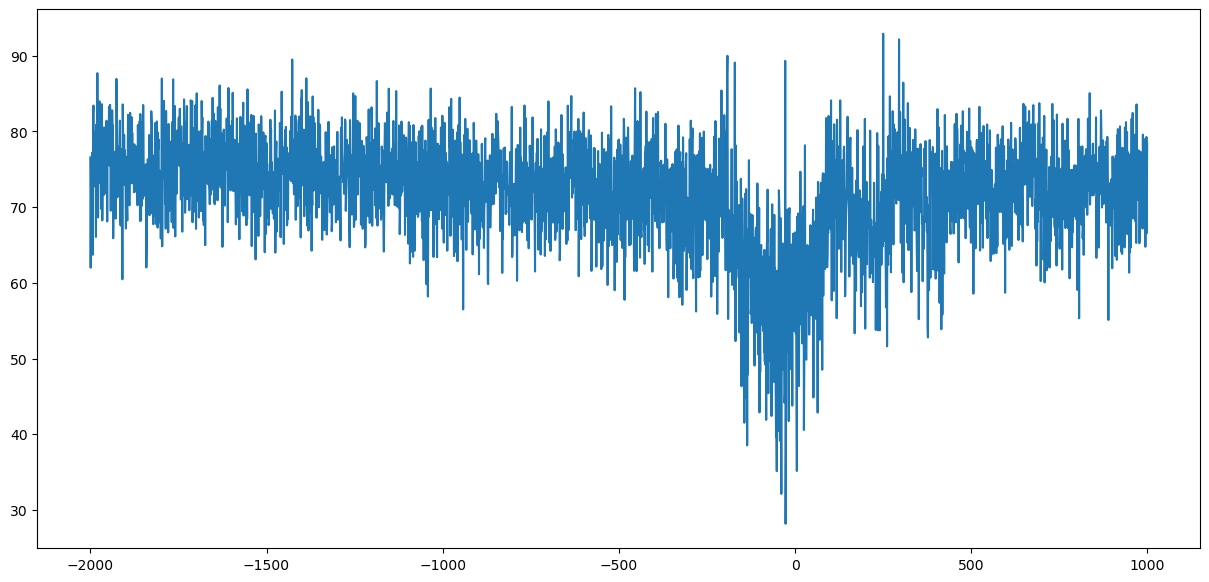

In [17]:
plt.figure(figsize=(15,7))
plt.plot(np.array(x)-2000, np.array(y))

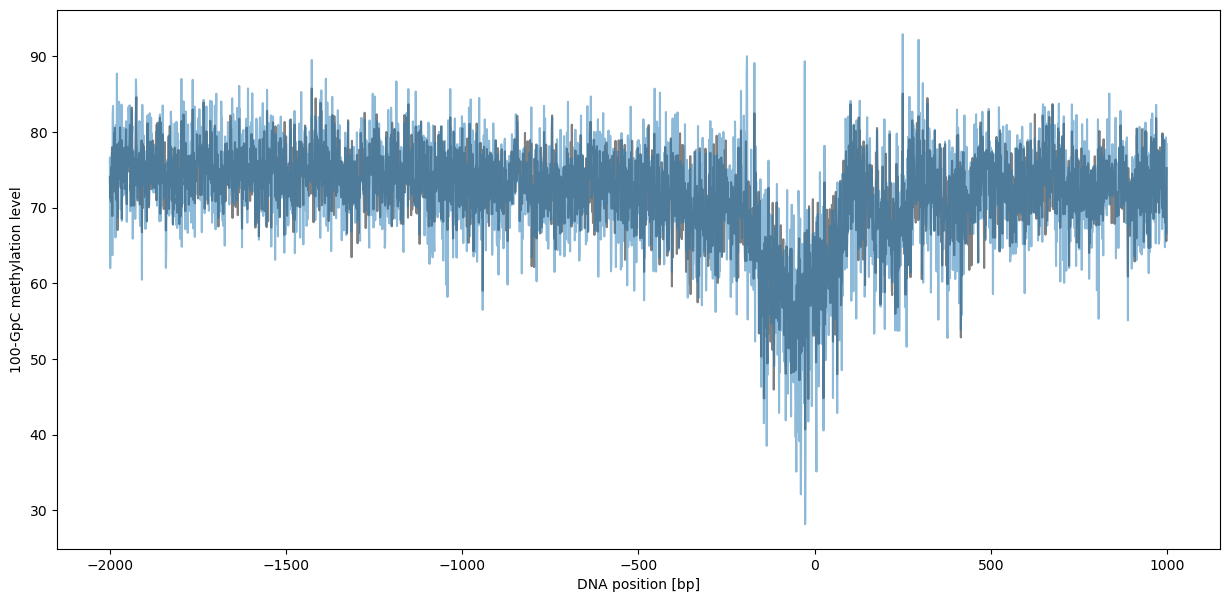

In [18]:
nome.plot_avg_methylation_levels(df_GCH_meth_filtered, 'GCH')
plt.plot(np.array(x)-2000, np.array(y), alpha=0.5)

In [19]:
x = []
y = []
for site in res:
    if site[3] == '+':
        x.append(site[1])
        y.append(site[4])

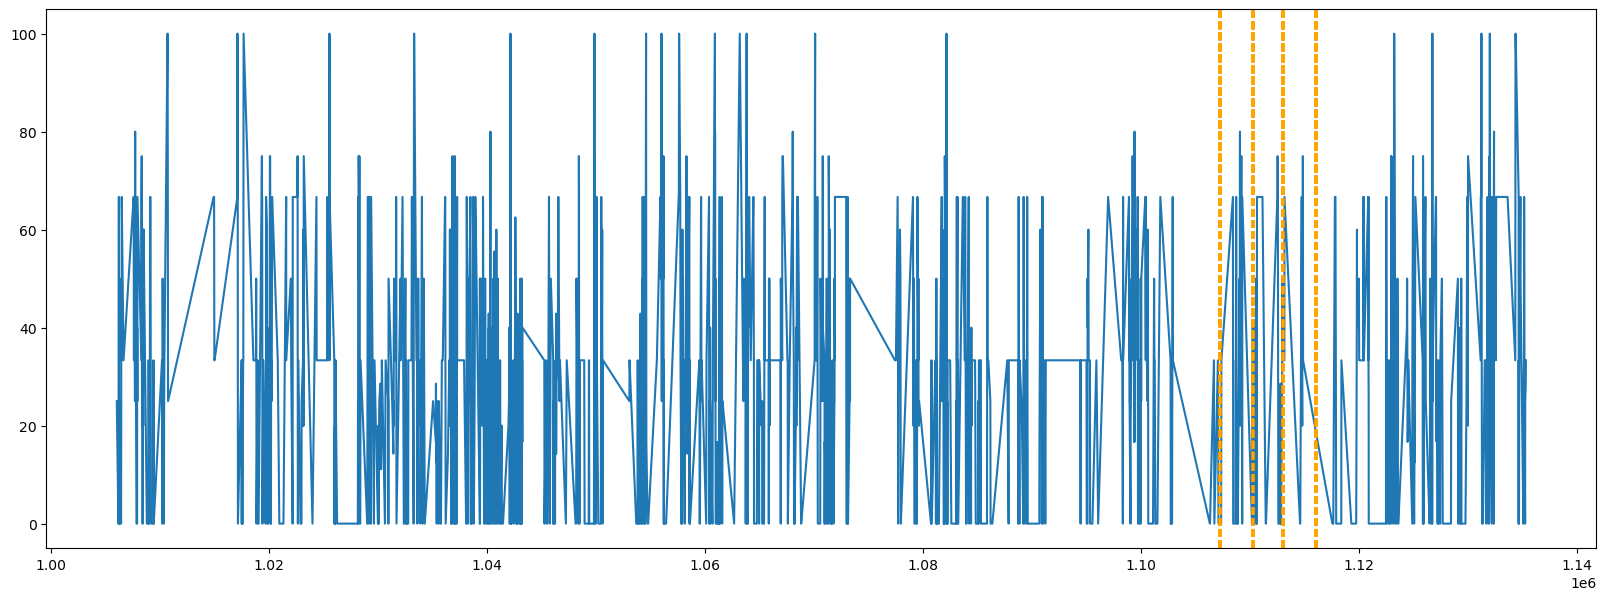

In [20]:
## check on a small range
range_a = 6000
range_b = 8000

plt.figure(figsize=(20,7))
plt.plot(x[range_a:range_b],y[range_a:range_b])

promoter_in_range = df_GCH_meth_filtered[np.all([df_GCH_meth_filtered['promoter_start'] > x[range_a:range_b][0],
                                                 df_GCH_meth_filtered['promoter_end'] < x[range_a:range_b][-1]], axis = 0)]

for i in range(promoter_in_range.shape[0]):
    plt.axvline(x=promoter_in_range.iloc[i]['promoter_start'], color='orange', linestyle='--')
    plt.axvline(x=promoter_in_range.iloc[i]['promoter_end'], color='orange', linestyle='--')

no of promoters 1683


99it [05:00,  3.03s/it]


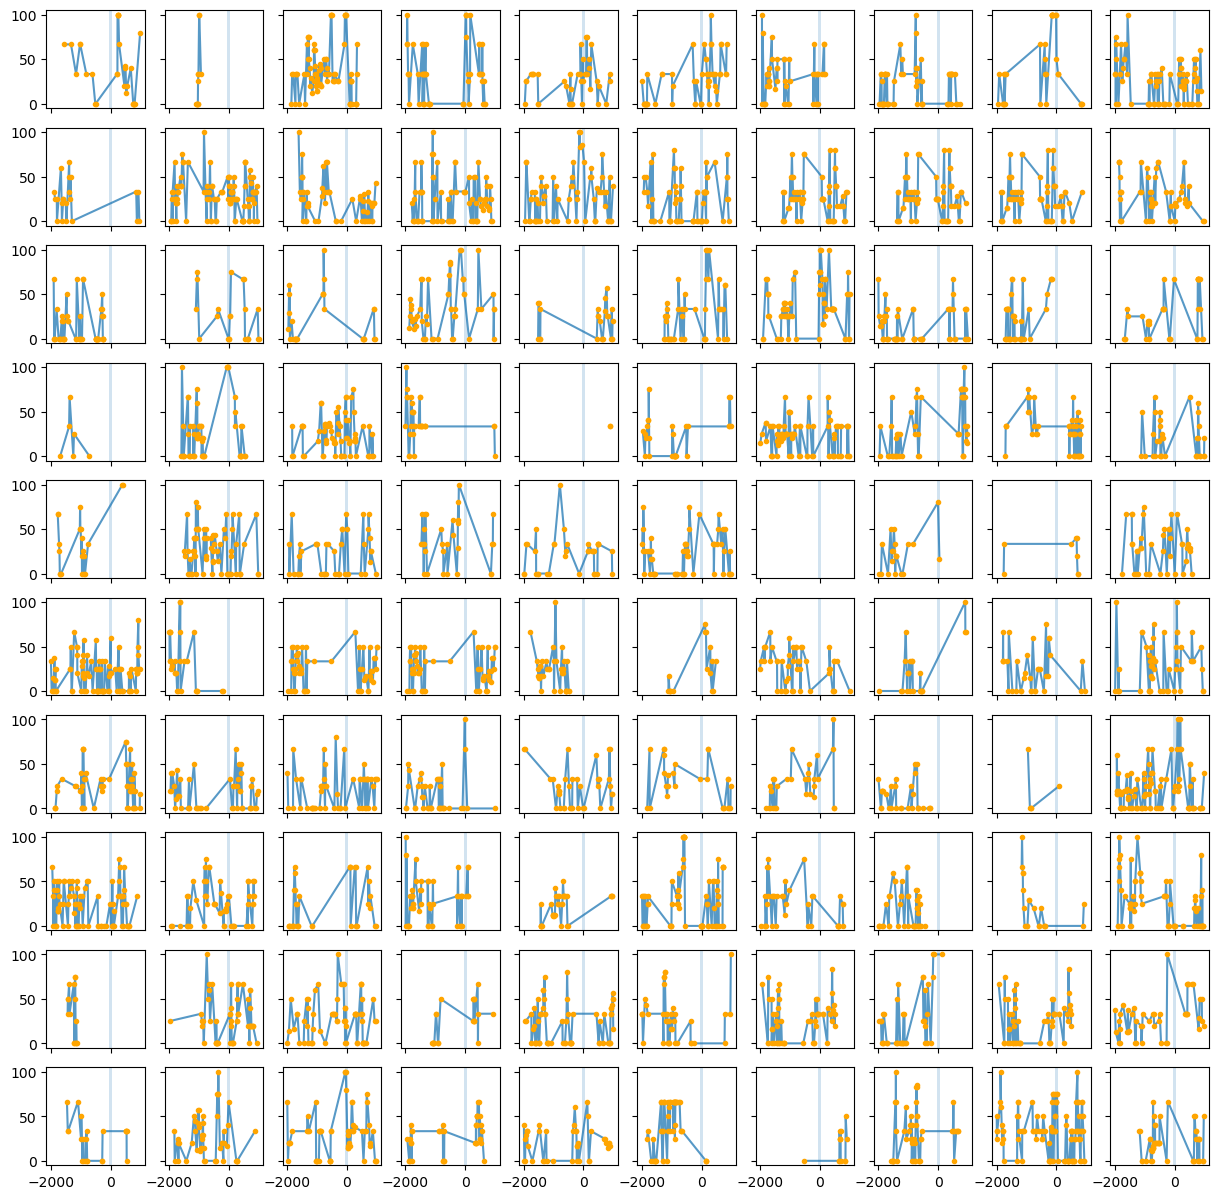

In [21]:
groups = df_GCH_meth_filtered.groupby('trans_id')

print('no of promoters', len(groups))

points = []
for i, (name, group) in tqdm(enumerate(groups)):
    start = group.iloc[0]['promoter_start']
    end = group.iloc[0]['promoter_end']

    xpos = []
    yval = []
    for site in res:
        ## only + strands
        if site[3] == '+':
            ## check if GCH site is inside promoter
            if site[1] >= start and site[2] <= end:
                xpos.append(site[1] - start)
                yval.append(site[4])

    if i%100 == 0:
        # plt.figure(figsize=(20,20))
        fig, axs = plt.subplots(10, 10, sharex='all', sharey='all', figsize=(15,15))

    # plt.subplot(10, 10, i+1)
    axs[i//10,i%10].plot(np.array(xpos)-2000, yval, alpha = 0.75)
    axs[i//10,i%10].plot(np.array(xpos)-2000, yval, '.', c='orange')
    axs[i//10,i%10].axvspan(-50, 50, alpha=0.2)
    # plt.plot(xpos, yval)

    if i == 99:
        break

plt.show()

In [22]:
## The current algorithm assumes sorted nature

In [8]:
filtered_res = []
for site in res:
    ## only + strands
    if site[3] == '+':
        filtered_res.append(site)

In [9]:
len(filtered_res), filtered_res[0]

(4005637, ['chr1', 13026, 13027, '+', 0.0, 3])

In [10]:
start = filtered_res[0][1] - 90
end = start + 100
step = 20
pos = 0

itr_count = 0
while (start < filtered_res[-1][1]):
    print(f'current window {start}, {end}')
    freq = []
    for itr in range(pos, len(filtered_res)):
        print(f'check on : {filtered_res[itr]} itr : {itr} pos : {pos}')
        if start > filtered_res[itr][1]:
            ## increase the start of the search such that we start near the window
            pos += 1
        elif start <= filtered_res[itr][1] and end >= filtered_res[itr][1]:
            freq.append((filtered_res[itr][1], filtered_res[itr][4]))
        elif end < filtered_res[itr][1]:
            ## the rest of sites are away from the window
            break
    
    print(f'window : ({start}, {end}) and intersections found : {freq}')
    print('------------')
    start += step
    end += step
    itr_count += 1

    if itr_count == 10:
        break

current window 12936, 13036
check on : ['chr1', 13026, 13027, '+', 0.0, 3] itr : 0 pos : 0
check on : ['chr1', 13034, 13035, '+', 33.33, 3] itr : 1 pos : 0
check on : ['chr1', 13053, 13054, '+', 0.0, 3] itr : 2 pos : 0
window : (12936, 13036) and intersections found : [(13026, 0.0), (13034, 33.33)]
------------
current window 12956, 13056
check on : ['chr1', 13026, 13027, '+', 0.0, 3] itr : 0 pos : 0
check on : ['chr1', 13034, 13035, '+', 33.33, 3] itr : 1 pos : 0
check on : ['chr1', 13053, 13054, '+', 0.0, 3] itr : 2 pos : 0
check on : ['chr1', 13057, 13058, '+', 0.0, 3] itr : 3 pos : 0
window : (12956, 13056) and intersections found : [(13026, 0.0), (13034, 33.33), (13053, 0.0)]
------------
current window 12976, 13076
check on : ['chr1', 13026, 13027, '+', 0.0, 3] itr : 0 pos : 0
check on : ['chr1', 13034, 13035, '+', 33.33, 3] itr : 1 pos : 0
check on : ['chr1', 13053, 13054, '+', 0.0, 3] itr : 2 pos : 0
check on : ['chr1', 13057, 13058, '+', 0.0, 3] itr : 3 pos : 0
check on : ['ch

In [11]:
def getGCHcount_in_window(window, res, pos):
    '''
        element in res = ['chr20', 60110, 60111, '+', 0.0, 3]
    '''
    start, end = window
    freq = []
    meth_c_count = 0
    net_c_count = 0
    for itr in range(pos, len(res)):
        if start > res[itr][1]:
            ## increase the start of the search such that we start near the window
            pos += 1
        elif start <= res[itr][1] and end >= res[itr][1]:
            freq.append((res[itr][1], res[itr][4], res[itr][5], round(res[itr][4]*res[itr][5]/100)))
            meth_c_count += round(res[itr][4]*res[itr][5]/100)
            net_c_count += res[itr][5]
        elif end < res[itr][1]:
            ## the rest of sites are away from the window
            break

    unmeth_c_count = net_c_count - meth_c_count
    return meth_c_count, unmeth_c_count, freq, pos

In [12]:
from scipy.stats import chi2_contingency
import time

In [13]:
start = filtered_res[0][1] - 90
end = start + 100
step = 20
pos_window = 0
pos_bg_left = 0
pos_bg_right = 0

n = (filtered_res[-1][1] - filtered_res[0][1])/step
progress_check = int(n/20)

regions = []
itr_count = 0
curr_time = time.time()
while (start < filtered_res[-1][1]):
    if itr_count != 0 and itr_count%progress_check == 0:
        print('progress : {}% and time elapsed {} min'.format(round(itr_count*100/n,2), round((time.time()-curr_time)/60,2)))
    
    window = (start, end)
    meth_c_count, unmeth_c_count, freq, pos_window = getGCHcount_in_window(window, filtered_res, pos_window)

    if not meth_c_count > 0:
        start += step
        end += step
        itr_count += 1
        continue
    
    window_bf_left = (start-4000, start)
    meth_c_count_bg_left, unmeth_c_count_bg_left, freq_bg_left, pos_bg_left = getGCHcount_in_window(window_bf_left, filtered_res, pos_bg_left)
    
    window_bf_right = (end, end+4000)
    meth_c_count_bg_right, unmeth_c_count_bg_right, freq_bg_right, pos_bg_right = getGCHcount_in_window(window_bf_right, filtered_res, pos_bg_right)

    '''
                Window(NDR)         background
        Meth    meth_c_count    meth_c_count_bg
        Unmeth  unmeth_c_count  unmeth_c_count_bg   
    '''

    meth_c_count_bg = meth_c_count_bg_left + meth_c_count_bg_right
    unmeth_c_count_bg = unmeth_c_count_bg_left + unmeth_c_count_bg_right

    ## same condition as above -- if condition for bg
    if not meth_c_count_bg > 0:
        start += step
        end += step
        itr_count += 1
        continue
    
    table = np.array([[meth_c_count, meth_c_count_bg],
                      [unmeth_c_count, unmeth_c_count_bg]])
    
    chi_test = chi2_contingency(table)

    if -np.log10(chi_test.pvalue) > 5:
        regions.append(window)
    
    start += step
    end += step
    itr_count += 1

progress : 5.0% and time elapsed 3.31 min
progress : 10.0% and time elapsed 7.01 min
progress : 15.0% and time elapsed 10.78 min
progress : 20.0% and time elapsed 14.45 min
progress : 25.0% and time elapsed 17.66 min
progress : 30.0% and time elapsed 19.57 min
progress : 35.0% and time elapsed 21.09 min
progress : 40.0% and time elapsed 22.67 min
progress : 45.0% and time elapsed 24.03 min
progress : 50.0% and time elapsed 25.13 min
progress : 55.0% and time elapsed 25.16 min
progress : 60.0% and time elapsed 25.92 min
progress : 65.0% and time elapsed 28.17 min
progress : 70.0% and time elapsed 31.3 min
progress : 75.0% and time elapsed 34.44 min
progress : 80.0% and time elapsed 37.08 min
progress : 85.0% and time elapsed 39.68 min
progress : 90.0% and time elapsed 41.79 min
progress : 95.0% and time elapsed 43.14 min
progress : 100.0% and time elapsed 44.33 min


In [14]:
len(regions), regions[0], regions[1]

(16389, (238756, 238856), (569296, 569396))

In [15]:
merged_regions = []
i = 0
while i < len(regions):
    start, end = regions[i]
    print(f'start {start} end {end} - begin merging')
    for j in range(i+1, len(regions)):
        if regions[j][0] <= end:
            print(f'merging {regions[j]}')
            end = regions[j][1]
        else:
            print(f'stop merging at {regions[j]}')
            i = j
            break
    
    print(f'Merged Region: {(start, end)}')
    print(' ')
    merged_regions.append((start, end))

    if i >= 10:
        break

start 238756 end 238856 - begin merging
stop merging at (569296, 569396)
Merged Region: (238756, 238856)
 
start 569296 end 569396 - begin merging
merging (569316, 569416)
merging (569336, 569436)
stop merging at (723336, 723436)
Merged Region: (569296, 569436)
 
start 723336 end 723436 - begin merging
merging (723356, 723456)
stop merging at (754016, 754116)
Merged Region: (723336, 723456)
 
start 754016 end 754116 - begin merging
merging (754036, 754136)
merging (754056, 754156)
merging (754076, 754176)
merging (754096, 754196)
stop merging at (772456, 772556)
Merged Region: (754016, 754196)
 


In [16]:
merged_regions = []

n = len(regions)
progress_check = int(n/10)

i = 0
curr_time = time.time()
while i < n:
    if i != 0 and i%progress_check == 0:
        print('progress : {}% and time elapsed {} min'.format(round(i*100/n,2), round((time.time()-curr_time)/60,2)))

    start, end = regions[i]

    if i+1 < n:
        for j in range(i+1, n):
            if regions[j][0] <= end:
                end = regions[j][1]
            else:
                i = j
                break
    
        if j == n-1 and i != j:
            i = n

        merged_regions.append((start, end))
    else:
        i += 1
        assert i == n
        merged_regions.append((start, end))

progress : 19.99% and time elapsed 0.0 min
progress : 59.97% and time elapsed 0.0 min
progress : 69.96% and time elapsed 0.0 min


In [17]:
len(merged_regions), merged_regions[0]

(5889, (238756, 238856))

In [19]:
outfile = data_path + 'GCH.NDR.chr1.window.bed'
with open(outfile, 'w') as fout:
    for reg in merged_regions:
        temp = ['chr1', str(reg[0]), str(reg[1])]
        fout.write('\t'.join(temp) + '\n')

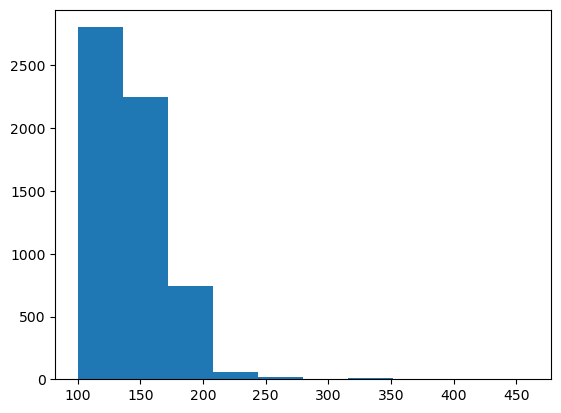

In [34]:
plt.hist([reg[1] - reg[0] for reg in merged_regions])
plt.show()

In [35]:
groups = df_GCH_meth_filtered.groupby('trans_id')

print('no of promoters', len(groups))

points = []
for name, group in tqdm(groups):
    start = group.iloc[0]['promoter_start']
    end = group.iloc[0]['promoter_end']

    for reg in merged_regions:
            ## check if reg (NDR) is inside promoter
            if reg[0] >= start and reg[1] <= end:
                NDR_start = reg[0] - start - 2000
                NDR_end = reg[1] - start - 2000
                points.append((NDR_start, NDR_end))

no of promoters 1683


100%|██████████| 1683/1683 [00:04<00:00, 347.02it/s]


In [36]:
starts = [pt[0] for pt in points]
ends = [pt[1] for pt in points]

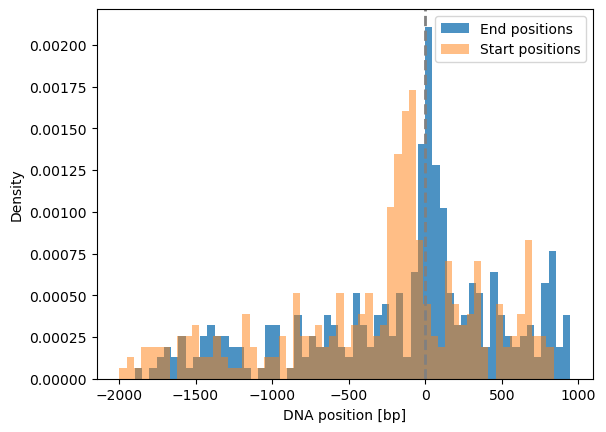

In [37]:
plt.figure()

plt.hist(ends,  bins = 60, histtype='bar', density=True, label="End positions", alpha = 0.8)  
plt.hist(starts, bins = 60, histtype='bar', density=True, label="Start positions", alpha = 0.5)   

plt.xlabel("DNA position [bp]")
plt.ylabel("Density")

# plt.xlim(-2000,1000)
plt.axvline(x=0, linestyle='dashed', linewidth=2, color='grey')
plt.legend()
plt.show()